In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [12]:
students = pd.read_csv("student_lifestyle_dataset.csv")

stress_mapping = {"High": 3, "Moderate": 2, "Low": 1}
students["Stress_Score"] = students["Stress_Level"].map(stress_mapping)
numeric_columns = students.select_dtypes(include=['number'])
if 'Student_ID' in numeric_columns.columns:
    numeric_columns = numeric_columns.drop(columns=['Student_ID'])
    

**Check the head of the dataframe.**

In [16]:
print(students.head())


   Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

    GPA Stress_Level  Stress_Score  
0  2.99     Moderate             2  
1  2.75          Low    

# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

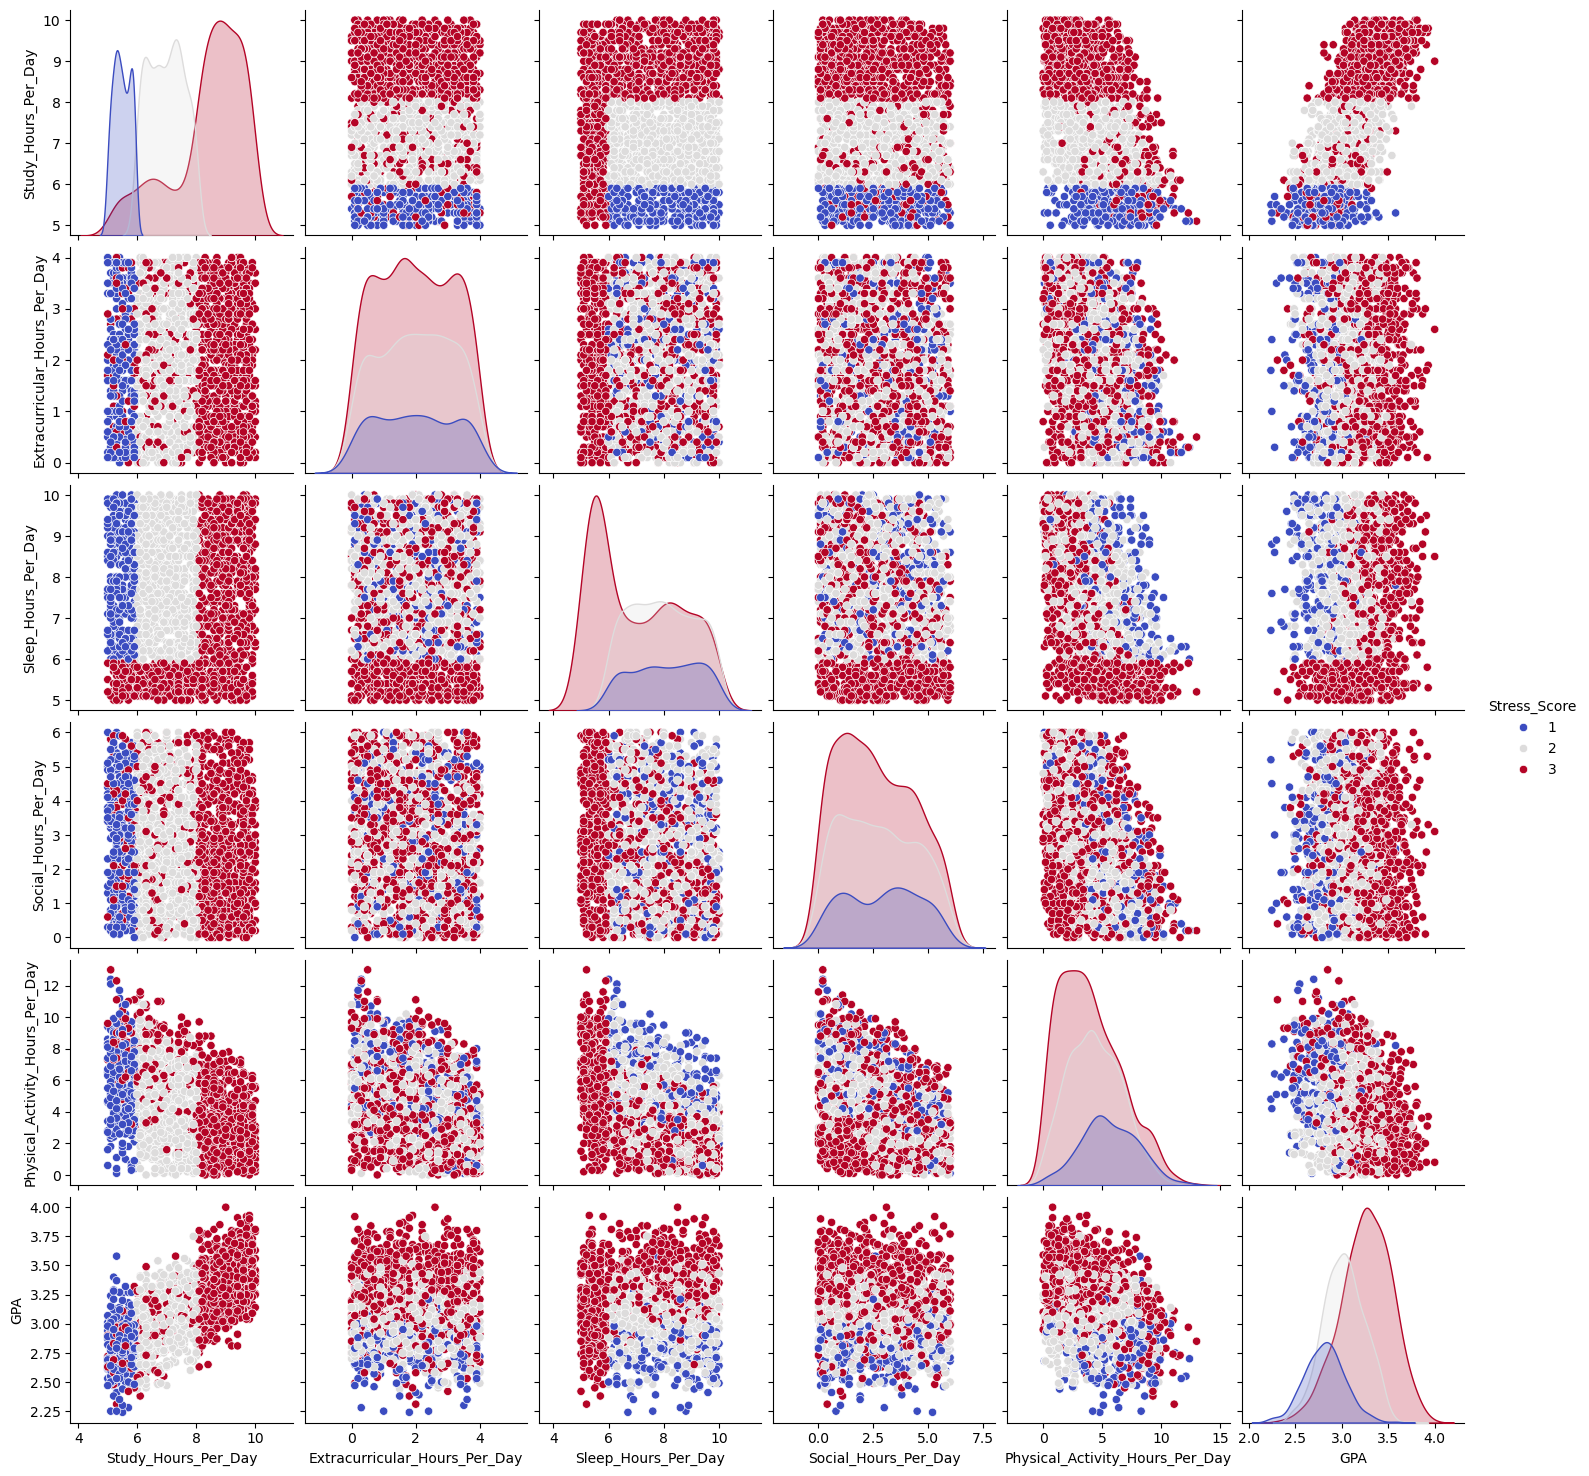

In [19]:
g = sns.pairplot(numeric_columns, hue = 'Stress_Score', palette='coolwarm')
plt.show()


# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [21]:
from sklearn.preprocessing import StandardScaler


** Create a StandardScaler() object called scaler.**

In [23]:
scaler = StandardScaler()

** Fit scaler to the features.**

In [25]:
scaler.fit(numeric_columns.drop('Stress_Score',axis=1))

StandardScaler()

**Use the .transform() method to transform the features to a scaled version.**

In [27]:
scaled_features = scaler.transform(numeric_columns.drop('Stress_Score',axis=1))

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [29]:
df_feat = pd.DataFrame(scaled_features,columns=numeric_columns.columns[:-1])
df_feat.head()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
0,-0.404487,1.566246,0.820734,0.056543,-1.005896,-0.421837
1,-1.528451,1.306633,0.341473,0.885882,-0.528470,-1.225591
2,-1.668947,1.652784,1.163063,-0.891273,0.108097,-1.493509
3,-0.685478,0.095105,-0.206253,-0.595080,0.864021,-0.790224
4,0.438487,-1.202961,-0.685514,-0.298888,0.903806,1.319630


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,numeric_columns['Stress_Score'],test_size=0.30)

In [34]:
from sklearn.tree import DecisionTreeClassifier


help(DecisionTreeClassifier)


In [37]:
dtc = DecisionTreeClassifier(max_depth=3)


In [39]:
dtc.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3)

In [42]:
pred = dtc.predict(X_test)


** Create a confusion matrix and classification report.**

In [44]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score


In [45]:
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))


[[ 88   0   0]
 [  0 213   0]
 [  0   0 299]]
1.0


In [46]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        88
           2       1.00      1.00      1.00       213
           3       1.00      1.00      1.00       299

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [48]:
error_rate = []

for i in range(1,40):
    
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_train,y_train)
    pred_i = dtc.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

**Now create the following plot using the information from your for loop.**

Text(0, 0.5, 'Error Rate')

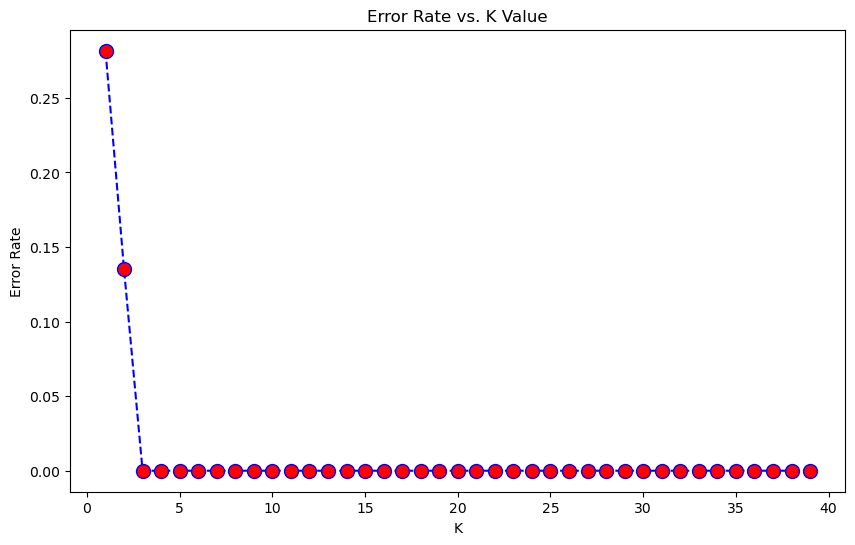

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [74]:
dtc = DecisionTreeClassifier(max_depth=2)

dtc.fit(X_train,y_train)
pred = dtc.predict(X_test)

print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(accuracy_score(y_test,pred))
print('\n')
print(classification_report(y_test,pred))




[[ 88   0   0]
 [  0 213   0]
 [ 16  65 218]]


0.865


              precision    recall  f1-score   support

           1       0.85      1.00      0.92        88
           2       0.77      1.00      0.87       213
           3       1.00      0.73      0.84       299

    accuracy                           0.86       600
   macro avg       0.87      0.91      0.88       600
weighted avg       0.89      0.86      0.86       600

